# FIT5202 Assignment 1 : Retail Analysis  Solution

## Table of Contents
* 
    * [Part 1 : Working with RDD](#part-1)
        * [1.1 Data Preparation and Loading](#1.1)
        * [1.2 Data Partitioning in RDD](#1.2)
        * [1.3 Query/Analysis](#1.3)
    * [Part 2 : Working with DataFrames](#2-dataframes)
        * [2.1 Data Preparation and Loading](#2-dataframes)
        * [2.2 Query/Analysis](#2.2)
    * [Part 3 :  RDDs vs DataFrame vs Spark SQL](#part-3)

# Part 1 : Working with RDDs <a class="anchor" name="part-1"></a>
## 1. Working with RDD
In this section, you will need to create RDDs from the given datasets, perform partitioning in these RDDs and use various RDD operations to answer the queries for retail analysis. 

### 1.1 Data Preparation and Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkContext object using SparkSession, which tells Spark how to access a cluster. To create a SparkSession you first need to build a SparkConf object that contains information about your application, using Melbourne time as the session timezone. Give an appropriate name for your application and run Spark locally with as many working processors as logical cores on your machine. 

In [1]:
# importing the SparkConf, SparkContext, SparkSession classes into the program
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession

# running spark in local mode 
processing_cores = "local[*]"

# application name for spark cluster UI page
application_name = "assignment1"

# setup configurations for spark
configuration = SparkConf().setMaster(processing_cores).setAppName(application_name).set('spark.sql.session.timeZone', 'Australia/Melbourne')
spark = SparkSession.builder.config(conf = configuration).getOrCreate()

# representing the spark context as sc
sc = spark.sparkContext
sc.setLogLevel("ERROR")
    


**1.1.2 For each features, sales and stores RDDs, remove the header rows and display the total count and first 10 records. Hint : You can use csv.reader to parse rows in RDDs.**

In [2]:
# reading the 3 csv data files and removing the header using rdd filter
# removing the header row because RDD operations are low-level Spark operations that do not rely on schema
features_rdd = spark.sparkContext.textFile("data/Features.csv")
features_header = features_rdd.first()
features_rdd = features_rdd.filter(lambda line: line != features_header)

sales_rdd = spark.sparkContext.textFile("data/sales.csv")
sales_header = sales_rdd.first()
sales_rdd = sales_rdd.filter(lambda line: line != sales_header)

stores_rdd = spark.sparkContext.textFile("data/stores.csv")
stores_header = stores_rdd.first()
stores_rdd = stores_rdd.filter(lambda line: line != stores_header)


In [3]:
# printing the total number of rows, and the first 10 rows of data from the three datasets given 
print("################ features RDD ################")
print("Number of rows: " + str(features_rdd.count()))
print("First 10 rows of features RDD")
print(features_rdd.take(10))
print(" ")

print("################ sales RDD ################")
print("Number of rows: " + str(sales_rdd.count()))
print("First 10 rows of sales RDD")
print(sales_rdd.take(10))
print(" ")

print("################ stores RDD ################")
print("Number of rows: " + str(stores_rdd.count()))
print("First 10 rows of stores RDD")
print(stores_rdd.take(10))
print(" ")

################ features RDD ################
Number of rows: 8190
First 10 rows of features RDD
['1,05/02/2010,42.31,2.572,NA,NA,NA,NA,NA,211.0963582,8.106,FALSE', '1,12/02/2010,38.51,2.548,NA,NA,NA,NA,NA,211.2421698,8.106,TRUE', '1,19/02/2010,39.93,2.514,NA,NA,NA,NA,NA,211.2891429,8.106,FALSE', '1,26/02/2010,46.63,2.561,NA,NA,NA,NA,NA,211.3196429,8.106,FALSE', '1,05/03/2010,46.5,2.625,NA,NA,NA,NA,NA,211.3501429,8.106,FALSE', '1,12/03/2010,57.79,2.667,NA,NA,NA,NA,NA,211.3806429,8.106,FALSE', '1,19/03/2010,54.58,2.72,NA,NA,NA,NA,NA,211.215635,8.106,FALSE', '1,26/03/2010,51.45,2.732,NA,NA,NA,NA,NA,211.0180424,8.106,FALSE', '1,02/04/2010,62.27,2.719,NA,NA,NA,NA,NA,210.8204499,7.808,FALSE', '1,09/04/2010,65.86,2.77,NA,NA,NA,NA,NA,210.6228574,7.808,FALSE']
 
################ sales RDD ################
Number of rows: 421570
First 10 rows of sales RDD
['1,1,05/02/2010,24924.5,FALSE', '1,1,12/02/2010,46039.49,TRUE', '1,1,19/02/2010,41595.55,FALSE', '1,1,26/02/2010,19403.54,FALSE', '1,1,05/0

### 1.2 Data Partitioning in RDD <a class="anchor" name="1.2"></a>
**1.2.1 How many partitions do the above RDDs have? How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy? Can you explain Why it will be partitioned in this number? Hint: searching the source code to try to understand the reason.**

In [4]:
# printing the number of partitions for the data in the RDDs
print(features_rdd.getNumPartitions())
print(sales_rdd.getNumPartitions())
print(stores_rdd.getNumPartitions())

2
2
2


If we mention only 1 core in the local\[ ] for processing, then only 1 partition is created.  By default, the number of partitions is 2 if nothing is mentioned. This default condition is possible only when the system has more than 1 core. Here in the above cell, the output number of partitions is 2 for the given data in the RDDs. This is because, we did not mention how many partitions we want. So by default, 2 partitions are made.

**1.2.2. Create a key value RDD for the store RDD, use the store type as the key and all of columns as the value. Print out the first 5 records of the key-value RDD.**

In [5]:
#splitting the second element  which is the store type and making it as the key element using split and map
stores_kv_rdd = stores_rdd.map(lambda x: (str(x.split(",")[1]), x.split(",")))
stores_kv_rdd.take(5)

[('A', ['1', 'A', '151315']),
 ('A', ['2', 'A', '202307']),
 ('B', ['3', 'B', '37392']),
 ('A', ['4', 'A', '205863']),
 ('B', ['5', 'B', '34875'])]

**1.2.3. Write the code to seperate the store key-value RDD based on the store type (each type should be in the same partition). Print out the total partition's number and the number of records in each partition.**

In [6]:
#creating 3 partitions based on the store key - A, B, C.
#First partition will be A, second partition will be based on B and respectively third will be for C
def func(key):
    if(key == "A"):
        return 0
    if(key == "B"):
        return 1
    if(key == "C"):
        return 2
    
# partitioning the data based on the function defined above by calling it
number_of_partitions = len(stores_kv_rdd.keys().distinct().collect())
store_partition_rdd = stores_kv_rdd.partitionBy(number_of_partitions, func)

#printing the data according to the partitions based on A, B or C
print("Number of partitions: "+ str(store_partition_rdd.getNumPartitions()))
print("Number of records in each partition: " + str(store_partition_rdd.glom().map(len).collect()))
print(store_partition_rdd.glom().collect())
        

Number of partitions: 3
Number of records in each partition: [22, 17, 6]
[[('A', ['1', 'A', '151315']), ('A', ['2', 'A', '202307']), ('A', ['4', 'A', '205863']), ('A', ['6', 'A', '202505']), ('A', ['8', 'A', '155078']), ('A', ['11', 'A', '207499']), ('A', ['13', 'A', '219622']), ('A', ['14', 'A', '200898']), ('A', ['19', 'A', '203819']), ('A', ['20', 'A', '203742']), ('A', ['24', 'A', '203819']), ('A', ['26', 'A', '152513']), ('A', ['27', 'A', '204184']), ('A', ['28', 'A', '206302']), ('A', ['31', 'A', '203750']), ('A', ['32', 'A', '203007']), ('A', ['33', 'A', '39690']), ('A', ['34', 'A', '158114']), ('A', ['36', 'A', '39910']), ('A', ['39', 'A', '184109']), ('A', ['40', 'A', '155083']), ('A', ['41', 'A', '196321'])], [('B', ['3', 'B', '37392']), ('B', ['5', 'B', '34875']), ('B', ['7', 'B', '70713']), ('B', ['9', 'B', '125833']), ('B', ['10', 'B', '126512']), ('B', ['12', 'B', '112238']), ('B', ['15', 'B', '123737']), ('B', ['16', 'B', '57197']), ('B', ['17', 'B', '93188']), ('B', ['1

### 1.3 Query/Analysis <a class="anchor" name="1.3"></a>
For this part, write relevant RDD operations to answer the following queries.

**1.3.1 Calculate the average weekly sales for each year.**

In [7]:
#Using split() , we are defining key value pair using the year of the date and the weekly sales 
#then grouping the keys to calculate the average sales
sales_rdd.map(lambda x: (x.split(",")[2].split("/")[2], float(x.split(",")[3]))).groupByKey().mapValues(lambda x: sum(x) / len(x)).collect()


[('2010', 16270.275737033313),
 ('2011', 15954.070675386392),
 ('2012', 15694.948597357718)]

<div style="background:rgba(255,181,116,0.5);padding:10px">
    <strong>NOTE:</strong> Other ways are also acceptable if they can get the correct result. 
    

</div>

**1.3.2 Find the highest temperature record in 2011 in the 'type B' store. You should display the store ID, date, highest temperature and type in the result.**

In [8]:
# joining the features RDD and store RDD as a single data using the store Id (A, B, C) as the key 
join_rdd = features_rdd.map(lambda x: (x.split(",")[0], x.split(",")[1:3])).join(stores_rdd.map(lambda x: (x.split(",")[0], [x.split(",")[1]]))).map(lambda x: (x[0], x[1][0] + x[1][1]))

#filtering the data to get type B stores data for 2011 and then getting its maximum temperature
join_filter_rdd = join_rdd.filter(lambda values: values[1][2] == "B").filter(lambda values: int(values[1][0].split("/")[2]) == 2011).max(lambda x: x[1][1])
print(join_filter_rdd)

('10', ['01/07/2011', '95.36', 'B'])


## Part 2. Working with DataFrames <a class="anchor" name="2-dataframes"></a>
In this section, you will need to load the given datasets into PySpark DataFrames and use DataFrame functions to answer the queries.
### 2.1 Data Preparation and Loading

**2.1.1. Load features, sales and stores data into three separate dataframes. When you create your dataframes, please refer to the metadata file and think about the appropriate data type for each columns (Note: you could directly read the date column as the string type)**

In [9]:
#importing libraries
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [10]:
#defining the schema for all the datasets based on the metadata file
feature_schema = StructType() \
.add("Store", IntegerType(), True) \
.add("Date", StringType(), True) \
.add("Temperature", DoubleType(), True) \
.add("Fuel_Price", DoubleType(), True) \
.add("Markdown1", DoubleType(), True) \
.add("Markdown2", DoubleType(), True) \
.add("Markdown3", DoubleType(), True) \
.add("Markdown4", DoubleType(), True) \
.add("Markdown5", DoubleType(), True) \
.add("CPI", DoubleType(), True) \
.add("Unemployment", DoubleType(), True) \
.add("IsHoliday", BooleanType(), True) 

sales_schema = StructType() \
.add("Store", IntegerType(), True) \
.add("Dept", IntegerType(), True) \
.add("Date", StringType(), True) \
.add("Weekly_Sales", DoubleType(), True) \
.add("IsHoliday", BooleanType(), True)

stores_schema = StructType() \
.add("Store", IntegerType(), True) \
.add("Type", StringType(), True) \
.add("Size", IntegerType(), True) 

In [11]:
#reading the 3 data files using spark 
features_df = spark.read.format("csv").option("header", True).options(delimiter = ','). schema(feature_schema).load("data/Features.csv")
sales_df = spark.read.format("csv").option("header", True).options(delimiter = ','). schema(sales_schema).load("data/sales.csv")
stores_df = spark.read.format("csv").option("header", True).options(delimiter = ','). schema(stores_schema).load("data/stores.csv")



**2.1.2 Display the schema of the features, sales and stores dataframes.**

In [12]:
# printing the schema of the three dataframes
print("########## Features df ##########")
features_df.printSchema()

print("########## Sales df ##########")
sales_df.printSchema()

print("########## Stores df ##########")
stores_df.printSchema()


########## Features df ##########
root
 |-- Store: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Fuel_Price: double (nullable = true)
 |-- Markdown1: double (nullable = true)
 |-- Markdown2: double (nullable = true)
 |-- Markdown3: double (nullable = true)
 |-- Markdown4: double (nullable = true)
 |-- Markdown5: double (nullable = true)
 |-- CPI: double (nullable = true)
 |-- Unemployment: double (nullable = true)
 |-- IsHoliday: boolean (nullable = true)

########## Sales df ##########
root
 |-- Store: integer (nullable = true)
 |-- Dept: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Weekly_Sales: double (nullable = true)
 |-- IsHoliday: boolean (nullable = true)

########## Stores df ##########
root
 |-- Store: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Size: integer (nullable = true)



### 2.2 QueryAnalysis  <a class="anchor" name="2.2"></a>
Implement the following queries using dataframes. You need to be able to perform operations like filtering, sorting, joining and group by using the functions provided by the DataFrame API. The following DF means dataframes.

**2.2.1. Transform 'Date' column in both feature and sales dataframe to the date type, after that print out these two DFs schema to show the results.**

In [13]:
#chaging the data type of the Date column in both the datasets from string to date using to_date()
features_df = features_df.withColumn("Date", to_date(features_df.Date, "dd/MM/yyyy"))
sales_df = sales_df.withColumn("Date", to_date(sales_df.Date, "dd/MM/yyyy"))

print(features_df.select("Date").dtypes)
print(sales_df.select("Date").dtypes)

[('Date', 'date')]
[('Date', 'date')]


**2.2.2. Calculate the average weekly sales for holiday week and non-holiday week seperately, order your result based on the average weekly sales in descending order. Print out the IsHoliday and average sales columns**

In [14]:
#printing the average weekly sales by grouping by holiday weeks
from pyspark.sql import functions as F
sales_df.groupby("IsHoliday").agg(F.avg("Weekly_Sales").alias("Average sales")).orderBy("Average sales").show()

+---------+------------------+
|IsHoliday|     Average sales|
+---------+------------------+
|    false|15901.445069008767|
|     true| 17035.82318735039|
+---------+------------------+



**2.2.3.Based on different years and months, calculate the average weekly sales.**

In [15]:
#grouping by the years and months and then printing the average weekly sales 
sales_df.groupby(F.year("Date").alias("Year"), F.month("Date").alias("Month")).agg(F.avg("Weekly_Sales").alias("Average sales")).orderBy("year", "month").show()

+----+-----+------------------+
|Year|Month|     Average sales|
+----+-----+------------------+
|2010|    2| 16076.77870090377|
|2010|    3|15432.626611808613|
|2010|    4|15745.551340409585|
|2010|    5|15996.481694653883|
|2010|    6|16486.250952748498|
|2010|    7|15972.812717533121|
|2010|    8| 16171.68929500989|
|2010|    9|15120.086691402259|
|2010|   10|14806.151497920526|
|2010|   11|17320.130647199454|
|2010|   12|19570.351251779048|
|2011|    1|13997.773991449336|
|2011|    2|15870.141203475016|
|2011|    3|15182.972004571237|
|2011|    4|15361.895495049488|
|2011|    5| 15367.86448054148|
|2011|    6| 16188.12464300947|
|2011|    7|15724.738312700913|
|2011|    8| 16030.54247768807|
|2011|    9|14961.570247273217|
+----+-----+------------------+
only showing top 20 rows



**2.2.4. Calculate the average MarkDown1 value in holiday week for all type C store.**

In [16]:
#inner joining the feature and store df based on the store key as a new df
features_store_join_df = features_df.join(stores_df, features_df.Store == stores_df.Store, "inner")

#filtering the store type for C and checking if the IsHoliday = True which implies for holiday week in the df
features_store_join_df = features_store_join_df.filter((features_store_join_df.Type == "C") & (features_store_join_df.IsHoliday == True))

#getting the average MarkDown1 and printing it
average_value = features_store_join_df.select(F.avg("Markdown1")).collect()
print(average_value)




[Row(avg(Markdown1)=778.2502439024388)]


**2.2.5.show all stores total sales based on each different month and yearly total for each different store, only keep two decimal places after the decimal point.**


In [17]:
#filtering for the year 2011 and grouping them by the month and getting the sum of the weekly sales 
#ordering by the store and month
groupby_month_df = sales_df.filter(F.year("Date") == 2011).groupby(sales_df.Store, F.month("Date").alias("Month")).agg(F.sum("Weekly_Sales").alias("Sales")).orderBy("Store", "Month")

# sum of weekly sales for ALL THE MONTHS and ordering by Store ID
groupby_year_df = groupby_month_df.groupby(groupby_month_df.Store).agg(F.sum("Sales").alias("Sales")).orderBy("Store")
groupby_year_df = groupby_year_df.withColumn("Month", lit(0))

#Appending the monthly and yearly sales dataframes and rounding upto 2 decimal places 
result_df = groupby_year_df.select("Store", "Month", "Sales").union(groupby_month_df).orderBy("Store", "Month")
result_df = result_df.withColumn('Month', when(result_df.Month == 0, lit('Total')).otherwise(result_df.Month))
result_df = result_df.withColumn('Sales', result_df.Sales.cast(DecimalType(18, 2)))
result_df.show()


+-----+-----+-----------+
|Store|Month|      Sales|
+-----+-----+-----------+
|    1|Total|80921918.83|
|    1|    1| 5480050.97|
|    1|    2| 6399887.57|
|    1|    3| 6307375.48|
|    1|    4| 7689123.60|
|    1|    5| 6128431.80|
|    1|    6| 6194971.74|
|    1|    7| 7227654.31|
|    1|    8| 6144985.73|
|    1|    9| 7379542.34|
|    1|   10| 6072327.75|
|    1|   11| 6864972.83|
|    1|   12| 9032594.71|
|    2|Total|98607881.42|
|    2|    1| 6949000.95|
|    2|    2| 8011783.74|
|    2|    3| 7529434.80|
|    2|    4| 9136076.69|
|    2|    5| 7162271.09|
|    2|    6| 7607607.16|
+-----+-----+-----------+
only showing top 20 rows



**2.2.6. Draw a scatter plot to show the relationship between weekly sales and unemployment rate, use the different color for the holiday week point. After that, discuss your findings based on the scatter plot**

<AxesSubplot: xlabel='Weekly_Sales', ylabel='Unemployment'>

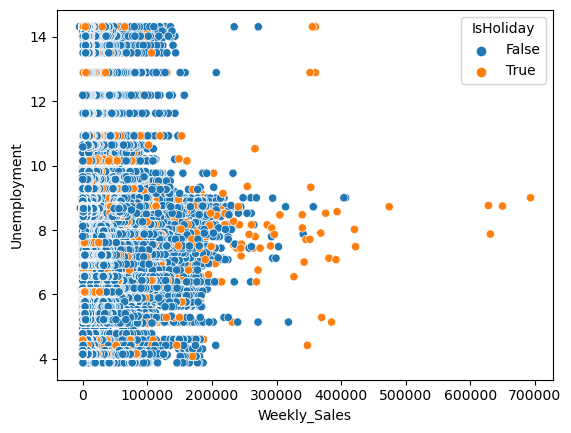

In [18]:
import seaborn as sns

sales_feature_join_df = sales_df.join(features_df, ["Store", "Date", "IsHoliday"], "inner")
sns.scatterplot(data = sales_feature_join_df.toPandas(), y = "Unemployment", x = "Weekly_Sales", hue = "IsHoliday")


<div style="background:rgba(255,181,116,0.5);padding:10px">
    <strong>NOTE:</strong> When the unemployment rate is larger than 10, it will have a big influence on weekly sales. 

</div>

The scatterplot shows the relationship between the weekly sales and the unemployment rate. From the graph we can infer that whenever the unemployment rate is less than 10%, the weekly sales are higher even when the IsHoliday is False. But when the unemployment is greater than 10%, the weekly sales are less in comparison when the unemployment is less then 10%.
When IsHoliday is True and the unemployment is less than 10%, the weekly sales are high in comparison when the unemployment rate is more than 10%.

### Part 3 RDDs vs DataFrame vs Spark SQL (15%) <a class="anchor" name="part-3"></a>
**Implement the following queries using RDDs, DataFrames and SparkSQL separately. Log the time taken for each query in each approach using the “%%time” built-in magic command in Jupyter Notebook and discuss the performance difference of these 3 approaches.**


**Why DF is faster than RDD?**

Dataframes are faster than RDDs in Spark. Dataframes support processing of large structured data (Schema). Dataframes are better than RDD in terms of memory management, optimized execution, and improves the scalability and performance of Spark. Although RDDs share some of the features, memory management and efficient execution is better in terms of Dataframes in Spark. That is the reason why DataFrame is faster than RDD. 

#### Query: Calculate the average weekly fuel price for all stores' size larger than 150000.

In [19]:
#creating temporary views from the data
features_df.createOrReplaceTempView("features_sql")
sales_df.createOrReplaceTempView("sales_sql")
stores_df.createOrReplaceTempView("stores_sql")

#### 3.1. For RDD

In [20]:
%%time

#average weekly fuel price using RDD
features_rdd.map(lambda line: line.split(",")).map(lambda x: (x[0], x[3])).join(stores_rdd.map(lambda line: line.split(",")).filter(lambda x: int(x[2]) > 150000).map(lambda x: (x[0], x[2]))).values().keys().map(lambda x: float(x)).mean()


CPU times: user 10.3 ms, sys: 2.4 ms, total: 12.7 ms
Wall time: 257 ms


3.3882162087912087

#### 3.2. For DataFrame

In [21]:
%%time

#average weekly fuel price using dataframe
features_df.join(stores_df.filter(stores_df.Size > 150000), ["Store"], "inner").agg({"Fuel_Price":"avg"}).show()

+------------------+
|   avg(Fuel_Price)|
+------------------+
|3.3882162087912078|
+------------------+

CPU times: user 2.62 ms, sys: 2.78 ms, total: 5.4 ms
Wall time: 221 ms


#### 3.3. For Spark SQL

In [22]:
%%time

#average weekly fuel price using Spark SQL
spark.sql("select avg(f.Fuel_Price) from features_sql f inner join stores_sql st on f.Store = st.Store where st.Size > 150000").show()

+------------------+
|   avg(Fuel_Price)|
+------------------+
|3.3882162087912078|
+------------------+

CPU times: user 5.07 ms, sys: 2.23 ms, total: 7.3 ms
Wall time: 203 ms


In [23]:
sc.stop()

#### Summary

The time might differ when running on different machines. Overall, the DataFrame and SQL queries run faster compared with RDD.


### Some ideas on the comparison

Armbrust, M., Huai, Y., Liang, C., Xin, R., & Zaharia, M. (2015). Deep Dive into Spark SQL’s Catalyst Optimizer. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html

Damji, J. (2016). A Tale of Three Apache Spark APIs: RDDs, DataFrames, and Datasets. Retrieved September 28, 2017, from https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html

Data Flair (2017a). Apache Spark RDD vs DataFrame vs DataSet. Retrieved September 28, 2017, from http://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset

Prakash, C. (2016). Apache Spark: RDD vs Dataframe vs Dataset. Retrieved September 28, 2017, from http://why-not-learn-something.blogspot.com.au/2016/07/apache-spark-rdd-vs-dataframe-vs-dataset.html

Xin, R., & Rosen, J. (2015). Project Tungsten: Bringing Apache Spark Closer to Bare Metal. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/28/project-tungsten-bringing-spark-closer-to-bare-metal.html

### References

* Tutorials 1-4 provided in the unit FIT5202

* PySpark cheat sheet provided in the unit FIT5202

* alexlipaalexlipa                    97922 gold badges99 silver badges2222 bronze badges, vikrant ranavikrant rana                    4 and JasonJason                    19922 silver badges66 bronze badges (1965) Spark RDD partition by key in Exclusive way, Stack Overflow. Available at: https://stackoverflow.com/questions/53383205/spark-rdd-partition-by-key-in-exclusive-way (Accessed: January 18, 2023). 

* Apache spark tutorial with examples (no date) Spark By {Examples}. Available at: https://sparkbyexamples.com/ (Accessed: January 18, 2023). 
dagg3rdagg3r                    34133 gold badges55 silver badges1212 bronze badges, titipatatitipata                    5 and Rakesh KumarRakesh Kumar                    4 (1964) Pyspark join rdds by a specific key, Stack Overflow. Available at: https://stackoverflow.com/questions/42821955/pyspark-join-rdds-by-a-specific-key (Accessed: January 18, 2023). 

* mar tinmar tin                    8 et al. (1963) Number of partitions in RDD and performance in Spark, Stack Overflow. Available at: https://stackoverflow.com/questions/35800795/number-of-partitions-in-rdd-and-performance-in-spark (Accessed: January 18, 2023). 

* nilesh1212nilesh1212                    1 et al. (1964) Apache spark: Get number of records per partition, Stack Overflow. Available at: https://stackoverflow.com/questions/46032320/apache-spark-get-number-of-records-per-partition (Accessed: January 18, 2023). 

* pyspark stackoverflow (no date) Stack Overflow. Available at: https://stackoverflow.com/search?q=pyspark&amp;s=2f7d55ae-68d6-4662-9a9b-d42e24ffa218 (Accessed: January 18, 2023). 
Statistical Data Visualization# (no date) seaborn. Available at: https://seaborn.pydata.org/index.html (Accessed: January 18, 2023). 

* WillardWillard                    49266 silver badges2121 bronze badges and Yosi HammerYosi Hammer                    58822 silver badges88 bronze badges (1966) How to use Pyspark to calculate average on RDD, Stack Overflow. Available at: https://stackoverflow.com/questions/57030626/how-to-use-pyspark-to-calculate-average-on-rdd (Accessed: January 18, 2023). 
